In [36]:
import pandas as pd
import math
import numpy as np

file_name1 = 'korea_exchang_bank.csv'
file_name2 = 'LG_electro.csv'

df1 = pd.read_csv(file_name1)[['Date', 'Close']]
df2 = pd.read_csv(file_name2)[['Date', 'Close']]

# For excel files:
# df = pd.read_excel(file_name, usecols=['Date', 'Close'])

df1['Date'] = pd.to_datetime(df1['Date'])
df1['Close'] = pd.to_numeric(df1['Close'])

df2['Date'] = pd.to_datetime(df2['Date'])
df2['Close'] = pd.to_numeric(df2['Close'])

# Drop null / NaN values
df1.dropna(inplace=True)
df2.dropna(inplace=True)

# Sort data from old to new
df1.sort_values(by='Date', ascending=True, inplace=True)
df2.sort_values(by='Date', ascending=True, inplace=True)

,Date,Low,High
3369,2000-01-04,8700.0,9800.0
3368,2000-01-05,8400.0,8940.0
3367,2000-01-06,7780.0,8790.0
3366,2000-01-07,7930.0,8400.0
3365,2000-01-10,8300.0,8900.0
...,...,...,...
4,2012-12-25,7700.0,7700.0
3,2012-12-26,7670.0,7820.0
2,2012-12-27,7520.0,7630.0
1,2012-12-28,7550.0,7640.0


In [37]:
bin_no = 12

# Function to calculate Symbol / Bin_Number
def which_bin(val, min, max):
    L = min - 1
    for i in range (1, bin_no):
        R = min + (max - min) / bin_no * i
        if  L < val <= R:
            return i

        L = R

    return bin_no

In [38]:
mi_values = {}

In [39]:
def getMutualInformation(df1, df2, year):
    # Calculate Log Return of close values
    df1['Rt'] = np.log(df1['Low'] / df1['Low'].shift(1))
    df2['Rt'] = np.log(df2['High'] / df2['High'].shift(1))

    df1.dropna(inplace=True)
    df2.dropna(inplace=True)

    min1 = df1['Rt'].min() 
    max1 = df1['Rt'].max()

    min2 = df2['Rt'].min() 
    max2 = df2['Rt'].max()

    df1['Symbol'] = df1['Rt'].apply(lambda value : which_bin(value, min1, max1))
    df2['Symbol'] = df2['Rt'].apply(lambda value : which_bin(value, min2, max2))

    df = pd.merge(df1, df2, on='Date', how='inner')

    # Frequency Calculation
    n = bin_no + 1

    Fx = [0] * n
    Fy = [0] * n
    Fxy = [[0] * n for _ in range (n)]

    for row in df.itertuples():
        x = row.Symbol_x
        y = row.Symbol_y

        Fxy[x][y] += 1
        Fx[x] += 1
        Fy[y] += 1

    # Probability Calculation
    Px = [0] * n
    Py = [0] * n
    Pxy = [[0] * n for _ in range (n)]


    total_frequency = sum(Fx)

    for i in range (1, n):
        Px[i] = Fx[i] / total_frequency
        Py[i] = Fy[i] / total_frequency

    for x in range (1, n):
        for y in range (1, n):
            Pxy[x][y] = Fxy[x][y] / total_frequency

    # Calculate Mutual Information
    Ixy = 0.0

    for i in range (1, n):
        for j in range (1, n):
            if Pxy[i][j] > 0 and Px[i] * Py[j] > 0:
                Ixy += Pxy[i][j] * math.log2(Pxy[i][j] / (Px[i] * Py[j]))

    mi_values[year] = Ixy

    print(f"Mutual Information I(Low, High) of {file_name} for year {year} is = {Ixy}");

In [40]:
for year in range (2002, 2013):
    df1 = data_frame[data_frame['Date'].dt.year == year][['Date', 'Low']]
    df2 = data_frame[data_frame['Date'].dt.year == year][['Date', 'High']]

    getMutualInformation(df1, df2, year)
    

Mutual Information I(Low, High) of korea_exchang_bank.csv for year 2002 is = 0.6393974653164449
Mutual Information I(Low, High) of korea_exchang_bank.csv for year 2003 is = 0.6158888118177421
Mutual Information I(Low, High) of korea_exchang_bank.csv for year 2004 is = 0.46423539430433747
Mutual Information I(Low, High) of korea_exchang_bank.csv for year 2005 is = 0.5203231710932101
Mutual Information I(Low, High) of korea_exchang_bank.csv for year 2006 is = 0.44856767934535446
Mutual Information I(Low, High) of korea_exchang_bank.csv for year 2007 is = 0.5346782582324753
Mutual Information I(Low, High) of korea_exchang_bank.csv for year 2008 is = 0.5541318387237332
Mutual Information I(Low, High) of korea_exchang_bank.csv for year 2009 is = 0.5536835164644023
Mutual Information I(Low, High) of korea_exchang_bank.csv for year 2010 is = 0.5019183518941723
Mutual Information I(Low, High) of korea_exchang_bank.csv for year 2011 is = 0.6509643615046418
Mutual Information I(Low, High) of kor

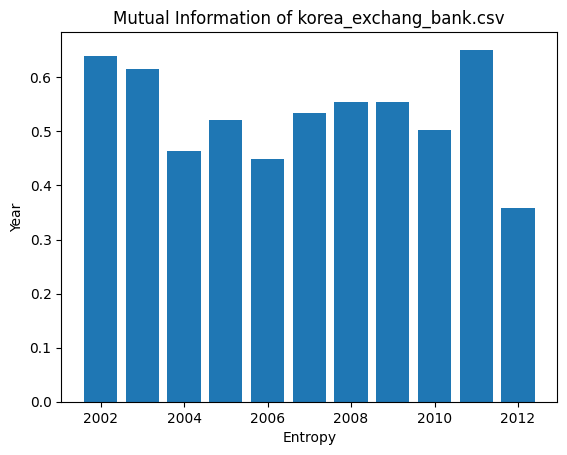

In [41]:
import matplotlib.pyplot as plt

plt.bar(mi_values.keys(), mi_values.values())
plt.xlabel('Entropy')
plt.ylabel('Year')
plt.title(f"Mutual Information of {file_name}")
plt.show()